## TDA persistent approach to metagenomics classification problem?
### Plan
1. Leer archivo blast
2. Opcional: subsetting
3. Reacomodo de datos
4. Construir Filtracion
5. Persistencia simplejos
6. Postprocesado
7. Exportar

In [13]:
# prerequisitos 
import pandas as pd
from matplotlib import cm
import numpy as np
import gudhi
import time 

## 1. Leer archivo blast

In [5]:
# Leer archivo blast
import os 
os.getcwd()
blast0 = pd.read_csv( 'all-blast.blast', sep = '\t',names = ['qseqid','sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore'])  

# asumimos que el orden de las columnas corresponde a 
# idrow qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore
# https://www.metagenomics.wiki/tools/blast/blastn-output-format-6

# Obtener solo evalue
blastE = pd.DataFrame(blast0,columns=['qseqid','sseqid','evalue'])
#pd.DataFrame(blast0[:,[0,1,10]])
blastE

,qseqid,sseqid,evalue
0,fig|1097677.33.peg.1,fig|31963.56.peg.1,0.000
1,fig|1097677.33.peg.1,fig|31963.54.peg.1,0.000
2,fig|1097677.33.peg.1,fig|1097677.33.peg.1,0.000
3,fig|1097677.33.peg.1,fig|31963.54.peg.1267,0.008
4,fig|1097677.33.peg.1,fig|31963.56.peg.1234,0.009
...,...,...,...
234236,fig|31963.56.peg.2892,fig|31963.54.peg.374,5.800
234237,fig|31963.56.peg.2892,fig|1097677.33.peg.377,5.800
234238,fig|31963.56.peg.2892,fig|31963.56.peg.2025,9.900
234239,fig|31963.56.peg.2892,fig|31963.54.peg.2061,9.900


### Seleccionar filas de interés
Trabajaremos con esta familia/conjunto de datos

"fig|1097677.33.peg.2900",
"fig|1097677.33.peg.2901",
"fig|1097677.33.peg.2902",
"fig|1097677.33.peg.2903",
"fig|1097677.33.peg.2904",
"fig|1097677.33.peg.1039",
"fig|1097677.33.peg.1860",
"fig|1097677.33.peg.908",
"fig|1097677.33.peg.2822",
"fig|1097677.33.peg.1171",
"fig|1097677.33.peg.309",
"fig|31963.54.peg.2916",
"fig|31963.54.peg.2917",
"fig|31963.54.peg.2918",
"fig|31963.54.peg.2919",
"fig|31963.54.peg.2920",
"fig|31963.54..peg.141",
"fig|31963.54.peg.103",
"fig|31963.54.peg.919",
"fig|31963.54.peg.1183",
"fig|31963.54.peg.1207",
"fig|31963.54.peg.486",
"fig|31963.56.peg.2888",
"fig|31963.56.peg.2889",
"fig|31963.56.peg.2890",
"fig|31963.56.peg.2891",
"fig|31963.56.peg.2892",
"fig|31963.56.peg.2626",
"fig|31963.56.peg.2811",
"fig|31963.56.peg.309"



In [11]:
# filter table
# genes
genes= ["fig|1097677.33.peg.2900",
"fig|1097677.33.peg.2901",
"fig|1097677.33.peg.2902",
"fig|1097677.33.peg.2903",
"fig|1097677.33.peg.2904",
"fig|1097677.33.peg.1039",
"fig|1097677.33.peg.1860",
"fig|1097677.33.peg.908",
"fig|1097677.33.peg.2822",
"fig|1097677.33.peg.1171",
"fig|1097677.33.peg.309",
"fig|31963.54.peg.2916",
"fig|31963.54.peg.2917",
"fig|31963.54.peg.2918",
"fig|31963.54.peg.2919",
"fig|31963.54.peg.2920",
"fig|31963.54..peg.141",
"fig|31963.54.peg.103",
"fig|31963.54.peg.919",
"fig|31963.54.peg.1183",
"fig|31963.54.peg.1207",
"fig|31963.54.peg.486",
"fig|31963.56.peg.2888",
"fig|31963.56.peg.2889",
"fig|31963.56.peg.2890",
"fig|31963.56.peg.2891",
"fig|31963.56.peg.2892",
"fig|31963.56.peg.2626",
"fig|31963.56.peg.2811",
"fig|31963.56.peg.309"]

# filter

distance_list = blastE[ blastE['qseqid'].isin(genes) & blastE['sseqid'].isin(genes)]
distance_list

,qseqid,sseqid,evalue
8580,fig|1097677.33.peg.309,fig|31963.56.peg.309,2.930000e-127
8581,fig|1097677.33.peg.309,fig|1097677.33.peg.309,2.930000e-127
25576,fig|1097677.33.peg.908,fig|1097677.33.peg.908,0.000000e+00
25577,fig|1097677.33.peg.908,fig|31963.54.peg.919,0.000000e+00
29269,fig|1097677.33.peg.1039,fig|1097677.33.peg.1039,0.000000e+00
...,...,...,...
234208,fig|31963.56.peg.2891,fig|31963.54.peg.2919,1.310000e-72
234209,fig|31963.56.peg.2891,fig|1097677.33.peg.2903,1.310000e-72
234229,fig|31963.56.peg.2892,fig|31963.56.peg.2892,1.910000e-26
234230,fig|31963.56.peg.2892,fig|31963.54.peg.2920,1.910000e-26


### Reacomodar datos
 El objetivo es acomodar los datos para usar el constructor de la filtración de un complejo simplicial con gudhi a partir de una matriz de distancias
 https://gudhi.inria.fr/python/latest/rips_complex_ref.html

In [38]:
#Definir distancia maxima, ie demisado grande para comparar biologicamente
MaxDistance = 5

# reshape long to wide
matrixE = pd.pivot_table(distance_list,index = "qseqid",values = "evalue",columns = 'sseqid', fill_value= MaxDistance )
#matrixE

# pasar de dataframe a matrix
DistanceMatrix = matrixE.to_numpy()
#DistanceMatrix

#Nombre de las columnas, es decir, nombres de genes

name_columns = matrixE.columns
name_columns

Index(['fig|1097677.33.peg.1039', 'fig|1097677.33.peg.1171',
       'fig|1097677.33.peg.1860', 'fig|1097677.33.peg.2822',
       'fig|1097677.33.peg.2900', 'fig|1097677.33.peg.2901',
       'fig|1097677.33.peg.2902', 'fig|1097677.33.peg.2903',
       'fig|1097677.33.peg.2904', 'fig|1097677.33.peg.309',
       'fig|1097677.33.peg.908', 'fig|31963.54.peg.103',
       'fig|31963.54.peg.1183', 'fig|31963.54.peg.1207',
       'fig|31963.54.peg.2916', 'fig|31963.54.peg.2917',
       'fig|31963.54.peg.2918', 'fig|31963.54.peg.2919',
       'fig|31963.54.peg.2920', 'fig|31963.54.peg.486', 'fig|31963.54.peg.919',
       'fig|31963.56.peg.2626', 'fig|31963.56.peg.2811',
       'fig|31963.56.peg.2888', 'fig|31963.56.peg.2889',
       'fig|31963.56.peg.2890', 'fig|31963.56.peg.2891',
       'fig|31963.56.peg.2892', 'fig|31963.56.peg.309'],
      dtype='object', name='sseqid')

4. Construir Filtracion


In [39]:
#Máxima longitud a calcular entre Complejos de Rips
max_edge_length = 2
#Construir Complejo de Rips a partir de matriz de distancia
start_time = time.time()
ripsComplex = gudhi.RipsComplex(
    distance_matrix = DistanceMatrix, 
    max_edge_length = max_edge_length
)
print("Se creó el Complejo de Rips en %s" % (time.time() - start_time) )

Se creó el Complejo de Rips en 0.0


In [26]:
#Crear filtración del Complejo de Rips
start_time = time.time()
simplexTree = ripsComplex.create_simplex_tree(
    max_dimension = 3
)
print("Se creó la filtración del Complejo de Rips en %s" % (time.time() - start_time))

Se creó la filtración del Complejo de Rips en 0.012692928314208984


5. Persistencia simplejos


In [40]:
#Crear persistencia de filtración del Complejo de Rips
start_time = time.time()
persistence = simplexTree.persistence()         #Parametros : homology_coeff_field = 11 default, min_persistence , persistence_dim_max
print("Se creó el diagrama de persistencia del Complejo de Rips en %s" % (time.time() - start_time))

Se creó el diagrama de persistencia del Complejo de Rips en 0.0


In [41]:
#Imprimir tiempos de nacimiento de simplejos
result_str = 'Complejo de Rips de dimensión ' + repr(simplexTree.dimension())
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplexTree.get_filtration():
    print(tuple(filtered_value))

Complejo de Rips de dimensión 2
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([1, 12], 0.0)
([13], 0.0)
([14], 0.0)
([4, 14], 0.0)
([15], 0.0)
([5, 15], 0.0)
([16], 0.0)
([6, 16], 0.0)
([17], 0.0)
([7, 17], 0.0)
([18], 0.0)
([8, 18], 0.0)
([19], 0.0)
([20], 0.0)
([10, 20], 0.0)
([21], 0.0)
([22], 0.0)
([3, 22], 0.0)
([23], 0.0)
([4, 23], 0.0)
([14, 23], 0.0)
([4, 14, 23], 0.0)
([24], 0.0)
([5, 24], 0.0)
([15, 24], 0.0)
([5, 15, 24], 0.0)
([25], 0.0)
([6, 25], 0.0)
([16, 25], 0.0)
([6, 16, 25], 0.0)
([26], 0.0)
([7, 26], 0.0)
([17, 26], 0.0)
([7, 17, 26], 0.0)
([27], 0.0)
([8, 27], 0.0)
([18, 27], 0.0)
([8, 18, 27], 0.0)
([28], 0.0)
([9, 28], 0.0)
([13, 19], 3.15e-08)


Se creó el código de barras 0.02286219596862793


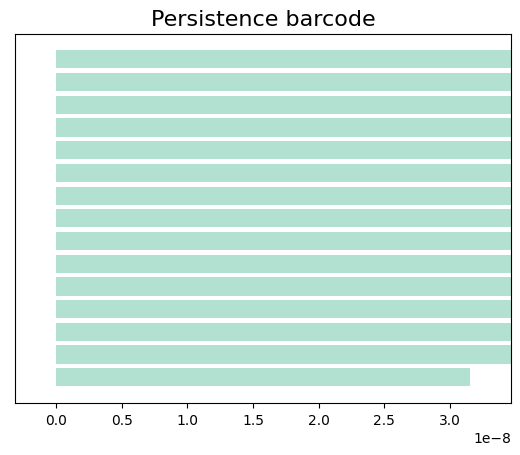

In [42]:
#Graficar códigos de barras
start_time = time.time()
gudhi.plot_persistence_barcode(
    persistence = persistence, 
    alpha = 0.5,
    colormap = cm.Set2.colors
)
print("Se creó el código de barras %s" % (time.time() - start_time))

In [43]:
#Definimos función para filtrar nuestra lista de persistencia
def dimension(list):
    return (len(list[0])-1, list[1])

In [ ]:
6. Postprocesado


In [44]:
#Filtramos de acuerdo a la función dimensión: nos ordena de mayor dimensión a menor y luego de mayor tiempo nacimiento a menor.
simplex_sorted_dim_1 = sorted(simplexTree.get_filtration(), key = dimension, reverse = True)
simplex_sorted_dim_1 

[([4, 14, 23], 0.0),
 ([5, 15, 24], 0.0),
 ([6, 16, 25], 0.0),
 ([7, 17, 26], 0.0),
 ([8, 18, 27], 0.0),
 ([13, 19], 3.15e-08),
 ([1, 12], 0.0),
 ([4, 14], 0.0),
 ([5, 15], 0.0),
 ([6, 16], 0.0),
 ([7, 17], 0.0),
 ([8, 18], 0.0),
 ([10, 20], 0.0),
 ([3, 22], 0.0),
 ([4, 23], 0.0),
 ([14, 23], 0.0),
 ([5, 24], 0.0),
 ([15, 24], 0.0),
 ([6, 25], 0.0),
 ([16, 25], 0.0),
 ([7, 26], 0.0),
 ([17, 26], 0.0),
 ([8, 27], 0.0),
 ([18, 27], 0.0),
 ([9, 28], 0.0),
 ([0], 0.0),
 ([1], 0.0),
 ([2], 0.0),
 ([3], 0.0),
 ([4], 0.0),
 ([5], 0.0),
 ([6], 0.0),
 ([7], 0.0),
 ([8], 0.0),
 ([9], 0.0),
 ([10], 0.0),
 ([11], 0.0),
 ([12], 0.0),
 ([13], 0.0),
 ([14], 0.0),
 ([15], 0.0),
 ([16], 0.0),
 ([17], 0.0),
 ([18], 0.0),
 ([19], 0.0),
 ([20], 0.0),
 ([21], 0.0),
 ([22], 0.0),
 ([23], 0.0),
 ([24], 0.0),
 ([25], 0.0),
 ([26], 0.0),
 ([27], 0.0),
 ([28], 0.0)]

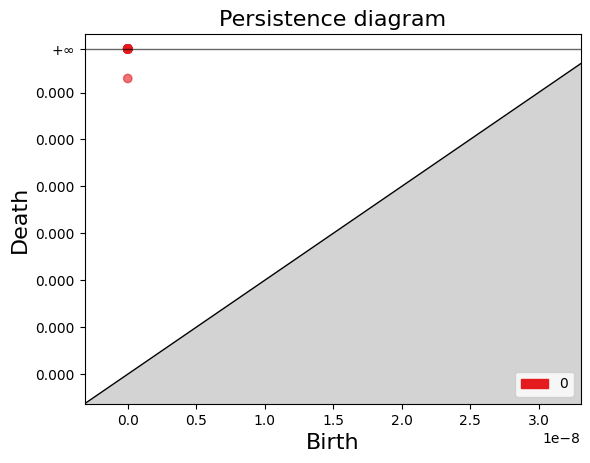

In [45]:
#Se crea el diagrama de persistencia
persistenceDiagram = gudhi.plot_persistence_diagram(
    persistence= persistence, 
    alpha=0.6,
    legend = True
)

In [46]:
#Definimos nuestra función de persistencia de simplejos
d_simplex_time = dict()
d_simplex_const = dict()
names = []
for tuple_simple in simplex_sorted_dim_1:
    list_aux = []
    if len(tuple_simple[0])-1 == simplexTree.dimension(): #En este caso no es necesario hacer comparaciones hacia arriba en la tabla de los simplex
        t_birth = tuple_simple[1]
        t_death = max_edge_length
        d_simplex_time[tuple(tuple_simple[0])] = (t_birth,t_death)
        list_aux = tuple([name_columns[tuple_simple[0][i]] for i in range(len(tuple_simple[0]))])
        d_simplex_const[list_aux] = (t_birth,t_death)
    else:
        t_birth = tuple_simple[1] 
        t_death = max_edge_length
        for simplex in d_simplex_time.keys():
            if set(tuple_simple[0]).issubset(set(simplex)):
                t_death = d_simplex_time[simplex][0] #La muerte de un simplejo más pequeño es el tiempo de nacimiento de otro
        d_simplex_time[tuple(tuple_simple[0])] = (t_birth,t_death)
        list_aux = tuple([name_columns[tuple_simple[0][i]] for i in range(len(tuple_simple[0]))])
        d_simplex_const[list_aux] = (t_birth,t_death)        

In [47]:
#Persistencia de Simplejos
d_simplex_time

{(4, 14, 23): (0.0, 2),
 (5, 15, 24): (0.0, 2),
 (6, 16, 25): (0.0, 2),
 (7, 17, 26): (0.0, 2),
 (8, 18, 27): (0.0, 2),
 (13, 19): (3.15e-08, 2),
 (1, 12): (0.0, 2),
 (4, 14): (0.0, 0.0),
 (5, 15): (0.0, 0.0),
 (6, 16): (0.0, 0.0),
 (7, 17): (0.0, 0.0),
 (8, 18): (0.0, 0.0),
 (10, 20): (0.0, 2),
 (3, 22): (0.0, 2),
 (4, 23): (0.0, 0.0),
 (14, 23): (0.0, 0.0),
 (5, 24): (0.0, 0.0),
 (15, 24): (0.0, 0.0),
 (6, 25): (0.0, 0.0),
 (16, 25): (0.0, 0.0),
 (7, 26): (0.0, 0.0),
 (17, 26): (0.0, 0.0),
 (8, 27): (0.0, 0.0),
 (18, 27): (0.0, 0.0),
 (9, 28): (0.0, 2),
 (0,): (0.0, 2),
 (1,): (0.0, 0.0),
 (2,): (0.0, 2),
 (3,): (0.0, 0.0),
 (4,): (0.0, 0.0),
 (5,): (0.0, 0.0),
 (6,): (0.0, 0.0),
 (7,): (0.0, 0.0),
 (8,): (0.0, 0.0),
 (9,): (0.0, 0.0),
 (10,): (0.0, 0.0),
 (11,): (0.0, 2),
 (12,): (0.0, 0.0),
 (13,): (0.0, 3.15e-08),
 (14,): (0.0, 0.0),
 (15,): (0.0, 0.0),
 (16,): (0.0, 0.0),
 (17,): (0.0, 0.0),
 (18,): (0.0, 0.0),
 (19,): (0.0, 3.15e-08),
 (20,): (0.0, 0.0),
 (21,): (0.0, 2),
 (22,)

In [48]:
d_simplex_const

{('fig|1097677.33.peg.2900',
  'fig|31963.54.peg.2916',
  'fig|31963.56.peg.2888'): (0.0, 2),
 ('fig|1097677.33.peg.2901',
  'fig|31963.54.peg.2917',
  'fig|31963.56.peg.2889'): (0.0, 2),
 ('fig|1097677.33.peg.2902',
  'fig|31963.54.peg.2918',
  'fig|31963.56.peg.2890'): (0.0, 2),
 ('fig|1097677.33.peg.2903',
  'fig|31963.54.peg.2919',
  'fig|31963.56.peg.2891'): (0.0, 2),
 ('fig|1097677.33.peg.2904',
  'fig|31963.54.peg.2920',
  'fig|31963.56.peg.2892'): (0.0, 2),
 ('fig|31963.54.peg.1207', 'fig|31963.54.peg.486'): (3.15e-08, 2),
 ('fig|1097677.33.peg.1171', 'fig|31963.54.peg.1183'): (0.0, 2),
 ('fig|1097677.33.peg.2900', 'fig|31963.54.peg.2916'): (0.0, 0.0),
 ('fig|1097677.33.peg.2901', 'fig|31963.54.peg.2917'): (0.0, 0.0),
 ('fig|1097677.33.peg.2902', 'fig|31963.54.peg.2918'): (0.0, 0.0),
 ('fig|1097677.33.peg.2903', 'fig|31963.54.peg.2919'): (0.0, 0.0),
 ('fig|1097677.33.peg.2904', 'fig|31963.54.peg.2920'): (0.0, 0.0),
 ('fig|1097677.33.peg.908', 'fig|31963.54.peg.919'): (0.0, 2),


In [49]:
simplices = list(d_simplex_const.keys())
genes = []
for i in range(len(simplices)):
    gen = ''
    list_genes = []
    for j in range(len(simplices[i])-1):
        list_genes.append(simplices[i][j])
        gen = gen+simplices[i][j]+'_'
    gen = gen + simplices[i][j]
    genes.append(gen)
simplices

[('fig|1097677.33.peg.2900', 'fig|31963.54.peg.2916', 'fig|31963.56.peg.2888'),
 ('fig|1097677.33.peg.2901', 'fig|31963.54.peg.2917', 'fig|31963.56.peg.2889'),
 ('fig|1097677.33.peg.2902', 'fig|31963.54.peg.2918', 'fig|31963.56.peg.2890'),
 ('fig|1097677.33.peg.2903', 'fig|31963.54.peg.2919', 'fig|31963.56.peg.2891'),
 ('fig|1097677.33.peg.2904', 'fig|31963.54.peg.2920', 'fig|31963.56.peg.2892'),
 ('fig|31963.54.peg.1207', 'fig|31963.54.peg.486'),
 ('fig|1097677.33.peg.1171', 'fig|31963.54.peg.1183'),
 ('fig|1097677.33.peg.2900', 'fig|31963.54.peg.2916'),
 ('fig|1097677.33.peg.2901', 'fig|31963.54.peg.2917'),
 ('fig|1097677.33.peg.2902', 'fig|31963.54.peg.2918'),
 ('fig|1097677.33.peg.2903', 'fig|31963.54.peg.2919'),
 ('fig|1097677.33.peg.2904', 'fig|31963.54.peg.2920'),
 ('fig|1097677.33.peg.908', 'fig|31963.54.peg.919'),
 ('fig|1097677.33.peg.2822', 'fig|31963.56.peg.2811'),
 ('fig|1097677.33.peg.2900', 'fig|31963.56.peg.2888'),
 ('fig|31963.54.peg.2916', 'fig|31963.56.peg.2888'),
 (

In [50]:
#Obtenemos todos los genes que aparecen en nuestros simplejos
pre_genes_numbers = []
        
for simplex in simplices:
    for i in range(len(simplex)):
        j = 0
        genString = ''
        while simplex[i][j] != '.':
            j = j+1
        if simplex[i][j] == '.':
            j = j+1
            while simplex[i][j] != '.':
                genString = genString + simplex[i][j]
                j = j+1
            pre_genes_numbers.append(genString)
pre_genes_numbers
genes_numbers = []
for gen in pre_genes_numbers:
    if gen not in genes_numbers:
        genes_numbers.append(gen)
genes_numbers

['33', '54', '56']

In [51]:
#Obtenemos la ocurrencia de cada gen en cada simplejo
bool_gen = dict()
genes_contains = dict()
num_new_columns = len(genes_numbers)
for simplex in simplices:
    genes_contains = dict()
    for i in range(len(simplex)):
        for gen in genes_numbers:
            if '.'+ gen + '.' in simplex[i]:
                genes_contains[gen] = 1
    for gen in genes_numbers:
        if gen not in genes_contains.keys():
            genes_contains[gen] = 0
    bool_gen[simplex] = genes_contains

In [52]:
births = []
deaths = []
persistent_times = []
for values in d_simplex_time.values():
    births.append(values[0])
    deaths.append(values[1])
    persistent_times.append(values[1]-values[0])

In [53]:
data = {
    'genes': genes,
    't_birth': births,
    't_death': deaths,
    'persistence': persistent_times
}
simplex_list = pd.DataFrame(index = simplices, data = data)
simplex_list.head(10)

,genes,t_birth,t_death,persistence
"(fig|1097677.33.peg.2900, fig|31963.54.peg.2916, fig|31963.56.peg.2888)",fig|1097677.33.peg.2900_fig|31963.54.peg.2916_...,0.000000e+00,2.0,2.0
"(fig|1097677.33.peg.2901, fig|31963.54.peg.2917, fig|31963.56.peg.2889)",fig|1097677.33.peg.2901_fig|31963.54.peg.2917_...,0.000000e+00,2.0,2.0
"(fig|1097677.33.peg.2902, fig|31963.54.peg.2918, fig|31963.56.peg.2890)",fig|1097677.33.peg.2902_fig|31963.54.peg.2918_...,0.000000e+00,2.0,2.0
"(fig|1097677.33.peg.2903, fig|31963.54.peg.2919, fig|31963.56.peg.2891)",fig|1097677.33.peg.2903_fig|31963.54.peg.2919_...,0.000000e+00,2.0,2.0
"(fig|1097677.33.peg.2904, fig|31963.54.peg.2920, fig|31963.56.peg.2892)",fig|1097677.33.peg.2904_fig|31963.54.peg.2920_...,0.000000e+00,2.0,2.0
"(fig|31963.54.peg.1207, fig|31963.54.peg.486)",fig|31963.54.peg.1207_fig|31963.54.peg.1207,3.150000e-08,2.0,2.0
"(fig|1097677.33.peg.1171, fig|31963.54.peg.1183)",fig|1097677.33.peg.1171_fig|1097677.33.peg.1171,0.000000e+00,2.0,2.0
"(fig|1097677.33.peg.2900, fig|31963.54.peg.2916)",fig|1097677.33.peg.2900_fig|1097677.33.peg.2900,0.000000e+00,0.0,0.0
"(fig|1097677.33.peg.2901, fig|31963.54.peg.2917)",fig|1097677.33.peg.2901_fig|1097677.33.peg.2901,0.000000e+00,0.0,0.0
"(fig|1097677.33.peg.2902, fig|31963.54.peg.2918)",fig|1097677.33.peg.2902_fig|1097677.33.peg.2902,0.000000e+00,0.0,0.0


In [54]:
for gen in genes_numbers:
    data = dict()
    dataFrame_aux = []
    for simplex in simplices:
        data[simplex] = bool_gen[simplex][gen]
    dataFrame_aux = pd.DataFrame.from_dict(data, orient='index', columns = [str(gen)])
    pd.concat([simplex_list, dataFrame_aux], axis = 1)

7. Exportar